# 8-1

Using the information on slide 8-16, find the Legendre weights and values for $N=4$ and $N=6$. Check them against the Table 3-1 values on slide 8-18.

In [1]:
import numpy as np
from scipy.integrate import trapz
from scipy.special import legendre
import matplotlib.pyplot as plt
from scipy.optimize import newton_krylov

In [2]:
legendre(n=3)

poly1d([ 2.5,  0. , -1.5,  0. ])

In [3]:
x = np.linspace(-1, 1, 1000000)

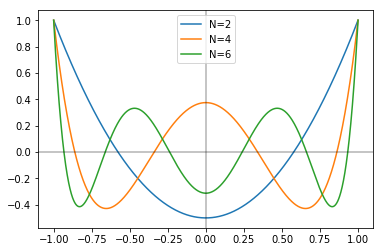

In [4]:
plt.plot(x, legendre(n=2)(x), label="N=2")
plt.plot(x, legendre(n=4)(x), label="N=4")
plt.plot(x, legendre(n=6)(x), label="N=6")
plt.legend(loc="upper center")
plt.axhline(y=0, color="black", alpha=0.3)
plt.axvline(x=0, color="black", alpha=0.3)
plt.show()

### N=4

Legendre Polynomial 0's

In [5]:
x1 = newton_krylov(legendre(4), 0.3)
print(x1)

0.3399814617870017


In [6]:
x2 = newton_krylov(legendre(4), 0.8)
print(x2)

0.8611363116238347


Weights

In [7]:
a = np.array(
    [[x1**i, x2**i] for i in [0, 2]]
)

In [8]:
def bf(order, intervals=10000000):
    x = np.linspace(-1, 1, intervals)
    p = x ** order
    return 0.5 * trapz(p, x)

In [9]:
b = np.array([bf(i) for i in [0, 2]])
b

array([1.        , 0.33333333])

In [10]:
w4 = np.linalg.solve(a, b)
print(w4)

[0.65214545 0.34785455]


In [11]:
w4_true = np.array([
    0.6521451549,
    0.3478548451
])

In [12]:
np.abs(w4_true - w4) / w4_true

array([4.54261268e-07, 8.51631906e-07])

### N=6

Legendre polynomial zeros

In [13]:
x1 = newton_krylov(legendre(6), 0.25)
x1

array(0.23861919)

In [14]:
x2 = newton_krylov(legendre(6), 0.65)
x2

array(0.66120942)

In [15]:
x3 = newton_krylov(legendre(6), 0.9)
x3

array(0.93246951)

Weights

In [16]:
a = np.array(
    [[x1**i, x2**i, x3**i] for i in [0, 2, 4]]
)

In [17]:
b = np.array([bf(i) for i in [0, 2, 4]])
b

array([1.        , 0.33333333, 0.2       ])

In [18]:
w6 = np.linalg.solve(a, b)
print(w6)

[0.46791396 0.36076157 0.17132447]


In [19]:
w6_true = np.array([
    0.4679139346, 
    0.3607615730,
    0.1713244924
])

In [20]:
np.abs(w6_true - w6) / w6_true

array([5.40410746e-08, 1.53056402e-08, 1.15365204e-07])

# 8-2

Solve for $\int_{-1}^1 f(x) dx$:

1. $f(x) = \mathrm{e}^{-2x}$
2. $f(x) = 0 (-1 < x < -0.2), 1 (-0.1 <x<1)$

using the Legendre-based quadratures from table 3-1 of the text. For each of them, use the 2, 4, 6, 8, 10, and 12 order quadrature parameters

In [21]:
half_orders = [1, 2, 3, 4, 5, 6]

## $f(x) = \mathrm{e}^{-2x}$

In [22]:
def f(x):
    return np.exp(-2 * x)

In [23]:
w = [
    [1.0],
    [0.6521451549, 0.3478548451],
    [0.4679139346, 0.3607615730, 0.1713244924],
    [0.3626837834, 0.3137066459, 0.2223810344, 0.1012285363],
    [0.2955242247, 0.2692667193, 0.2190863625, 0.1494513492, 0.0666713443],
    [0.2491470458, 0.2334925365, 0.2031674267, 0.1600783286, 0.1069393260, 0.0471753364]
]

In [24]:
x = [
    [0.5773502691],
    [0.3399810435, 0.8611363115], 
    [0.2386191860, 0.6612093864, 0.9324695142],
    [0.1834346424, 0.5255324099, 0.7966664774, 0.9602898564],
    [0.1488743389, 0.4333953941, 0.6794095682, 0.86506336663, 0.9739065285],
    [0.1252334085, 0.3678314989, 0.5873179542, 0.7699026741, 0.9041172563, 0.9815606342]
]

In [25]:
for o in half_orders:
    ws = np.array(w[o-1])
    xs = np.array(x[o-1])
    print(f"Order {2*o}: \t {ws.dot(f(xs)) + ws.dot(f(-xs))}")

Order 2: 	 3.4882249597952693
Order 4: 	 3.626779082014121
Order 6: 	 3.6268604008269216
Order 8: 	 3.6268604075194593
Order 10: 	 3.6268604076175026
Order 12: 	 3.626860407608563


Numerical real answer:

In [26]:
t = np.linspace(-1, 1, 100000)
trapz(f(t), t)

3.626860408330609

### $f(x) =  0 (-1 < x < -0.2), 1 (-0.1 <x<1)$

In [27]:
def f(x):
    if x <-0.2:
        return 0
    else:
        return 1
vf = np.vectorize(f)

In [28]:
for o in half_orders:
    ws = np.array(w[o-1])
    xs = np.array(x[o-1])
    print(f"Order {2*o}: \t {ws.dot(vf(xs)) + ws.dot(vf(-xs))}")

Order 2: 	 1.0
Order 4: 	 1.0
Order 6: 	 1.0
Order 8: 	 1.3626837834
Order 10: 	 1.2955242247
Order 12: 	 1.2491470458


Numerical real answer:

In [29]:
t = np.linspace(-1, 1, 100000)
trapz(vf(t), t)

1.2000020000200002

# 8-3

Demonstrate (not prove) that use of the $N=12$ quadrature can exactly integrate powers of $x^{\ell}$ between -1 and 1 for up to $\ell=2N-1=23$

In [30]:
errors = []
for l in range(0, 31, 2):
    t = np.linspace(-1, 1, 10000)
    g = np.vectorize(lambda x: x**l)
    true = trapz(g(t), t)
    ws = np.array(w[-1])
    xs = np.array(x[-1])
    pred = ws.dot(g(xs)) + ws.dot(g(-xs))
    e = np.abs(true - pred)
    errors.append(e)

Text(0, 0.5, 'Difference Between Numerical and Quadrature')

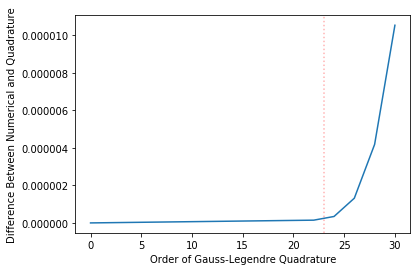

In [31]:
plt.plot(range(0, 31, 2), errors)
plt.axvline(x=23, color='r', linestyle=':', alpha=0.3)
plt.xlabel("Order of Gauss-Legendre Quadrature")
plt.ylabel("Difference Between Numerical and Quadrature")